In [6]:
import pandas as pd
import numpy as np
from sklearn.cross_validation import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt

In [8]:
data=pd.read_csv("IBM.csv")
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [19]:
front = data["Attrition"]
data.drop(labels=["Attrition"], axis=1, inplace = True)
data.insert(0,"Attrition", front)
data.head()

,Attrition,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,Yes,41,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,No,49,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,Yes,37,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,No,33,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,No,27,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [20]:
data = data.drop(["DailyRate"],axis=1)
data = data.drop(["HourlyRate"],axis=1)
data.head()
#There are 3 variables that show the similar thing: "Daily Rate", "Hourly Rate" and "Monthly Rate". The "Monthly rate" includes all the values of "Hourly" and "Daily Rates" when multiplying them by the number of days per month. That's the reason why I dropped these 2 variables in order not to have an extra data.

,Attrition,Age,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,Yes,41,Travel_Rarely,Sales,1,2,Life Sciences,1,1,2,...,1,80,0,8,0,1,6,4,0,5
1,No,49,Travel_Frequently,Research & Development,8,1,Life Sciences,1,2,3,...,4,80,1,10,3,3,10,7,1,7
2,Yes,37,Travel_Rarely,Research & Development,2,2,Other,1,4,4,...,2,80,0,7,3,3,0,0,0,0
3,No,33,Travel_Frequently,Research & Development,3,4,Life Sciences,1,5,4,...,3,80,0,8,3,3,8,7,3,0
4,No,27,Travel_Rarely,Research & Development,2,1,Medical,1,7,1,...,4,80,1,6,3,3,2,2,2,2


In [21]:
data = data.drop(["EmployeeCount"],axis=1)
data = data.drop(["Over18"],axis=1)
data = data.drop(["StandardHours"],axis=1)
data.head()
#These 3 variables have only one value: no variance. All of them would not contribute to the analysis, that's why they should be dropped.

,Attrition,Age,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,Yes,41,Travel_Rarely,Sales,1,2,Life Sciences,1,2,Female,...,3,1,0,8,0,1,6,4,0,5
1,No,49,Travel_Frequently,Research & Development,8,1,Life Sciences,2,3,Male,...,4,4,1,10,3,3,10,7,1,7
2,Yes,37,Travel_Rarely,Research & Development,2,2,Other,4,4,Male,...,3,2,0,7,3,3,0,0,0,0
3,No,33,Travel_Frequently,Research & Development,3,4,Life Sciences,5,4,Female,...,3,3,0,8,3,3,8,7,3,0
4,No,27,Travel_Rarely,Research & Development,2,1,Medical,7,1,Male,...,3,4,1,6,3,3,2,2,2,2


In [22]:
data = data.drop(["JobLevel"],axis=1)
data.head()
#This variable can be treated identical to the "Job Role" variable in order to have less but at the same time more precise variables, that's why I eliminated the "Job Level" variable.

,Attrition,Age,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,Yes,41,Travel_Rarely,Sales,1,2,Life Sciences,1,2,Female,...,3,1,0,8,0,1,6,4,0,5
1,No,49,Travel_Frequently,Research & Development,8,1,Life Sciences,2,3,Male,...,4,4,1,10,3,3,10,7,1,7
2,Yes,37,Travel_Rarely,Research & Development,2,2,Other,4,4,Male,...,3,2,0,7,3,3,0,0,0,0
3,No,33,Travel_Frequently,Research & Development,3,4,Life Sciences,5,4,Female,...,3,3,0,8,3,3,8,7,3,0
4,No,27,Travel_Rarely,Research & Development,2,1,Medical,7,1,Male,...,3,4,1,6,3,3,2,2,2,2


In [23]:
data["BusinessTravel"] = data["BusinessTravel"].astype("category").cat.reorder_categories(["Non-Travel","Travel_Rarely","Travel_Frequently"]).cat.codes
data["BusinessTravel"] = data["BusinessTravel"].where(data["BusinessTravel"]==0,1)

In [24]:
data["Attrition"] = data["Attrition"].astype("category").cat.reorder_categories(["Yes","No"]).cat.codes
data["Attrition"] = data["Attrition"].where(data["Attrition"]==0,1)

In [25]:
data["Gender"] = data["Gender"].astype("category").cat.reorder_categories(["Female","Male"]).cat.codes
data["Gender"] = data["Gender"].where(data["Gender"]==0,1)

In [26]:
data["MaritalStatus"] = data["MaritalStatus"].astype("category").cat.reorder_categories(["Single","Married","Divorced"]).cat.codes
data["MaritalStatus"] = data["MaritalStatus"].where(data["MaritalStatus"]==1,0)

In [27]:
data["OverTime"] = data["OverTime"].astype("category").cat.reorder_categories(["Yes","No"]).cat.codes

In [28]:
data.head()

,Attrition,Age,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0,41,1,Sales,1,2,Life Sciences,1,2,0,...,3,1,0,8,0,1,6,4,0,5
1,1,49,1,Research & Development,8,1,Life Sciences,2,3,1,...,4,4,1,10,3,3,10,7,1,7
2,0,37,1,Research & Development,2,2,Other,4,4,1,...,3,2,0,7,3,3,0,0,0,0
3,1,33,1,Research & Development,3,4,Life Sciences,5,4,0,...,3,3,0,8,3,3,8,7,3,0
4,1,27,1,Research & Development,2,1,Medical,7,1,1,...,3,4,1,6,3,3,2,2,2,2


In [29]:
department = pd.get_dummies(data["Department"])
department.head()

,Human Resources,Research & Development,Sales
0,0,0,1
1,0,1,0
2,0,1,0
3,0,1,0
4,0,1,0


In [30]:
education = pd.get_dummies(data["EducationField"])
education.head()

,Human Resources,Life Sciences,Marketing,Medical,Other,Technical Degree
0,0,1,0,0,0,0
1,0,1,0,0,0,0
2,0,0,0,0,1,0
3,0,1,0,0,0,0
4,0,0,0,1,0,0


In [31]:
role = pd.get_dummies(data["JobRole"])
role.head()

,Healthcare Representative,Human Resources,Laboratory Technician,Manager,Manufacturing Director,Research Director,Research Scientist,Sales Executive,Sales Representative
0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,1,0,0
2,0,0,1,0,0,0,0,0,0
3,0,0,0,0,0,0,1,0,0
4,0,0,1,0,0,0,0,0,0


In [32]:
# "Human Resources" column is being repeated. In order not to have an overlap, this one should also be dropped.

In [33]:
dropdepartment = department.drop(["Human Resources"],axis=1)
dropdepartment.head()

,Research & Development,Sales
0,0,1
1,1,0
2,1,0
3,1,0
4,1,0


In [34]:
dropeducation = education.drop(["Human Resources"],axis=1)
dropeducation.head()

,Life Sciences,Marketing,Medical,Other,Technical Degree
0,1,0,0,0,0
1,1,0,0,0,0
2,0,0,0,1,0
3,1,0,0,0,0
4,0,0,1,0,0


In [35]:
droprole = role.drop(["Human Resources"],axis=1)
droprole.head()

,Healthcare Representative,Laboratory Technician,Manager,Manufacturing Director,Research Director,Research Scientist,Sales Executive,Sales Representative
0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,1,0,0
2,0,1,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0
4,0,1,0,0,0,0,0,0


In [36]:
data.head()

,Attrition,Age,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0,41,1,Sales,1,2,Life Sciences,1,2,0,...,3,1,0,8,0,1,6,4,0,5
1,1,49,1,Research & Development,8,1,Life Sciences,2,3,1,...,4,4,1,10,3,3,10,7,1,7
2,0,37,1,Research & Development,2,2,Other,4,4,1,...,3,2,0,7,3,3,0,0,0,0
3,1,33,1,Research & Development,3,4,Life Sciences,5,4,0,...,3,3,0,8,3,3,8,7,3,0
4,1,27,1,Research & Development,2,1,Medical,7,1,1,...,3,4,1,6,3,3,2,2,2,2


In [37]:
data = data.drop(["Department"],axis=1)
data.head()

,Attrition,Age,BusinessTravel,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,JobInvolvement,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0,41,1,1,2,Life Sciences,1,2,0,3,...,3,1,0,8,0,1,6,4,0,5
1,1,49,1,8,1,Life Sciences,2,3,1,2,...,4,4,1,10,3,3,10,7,1,7
2,0,37,1,2,2,Other,4,4,1,2,...,3,2,0,7,3,3,0,0,0,0
3,1,33,1,3,4,Life Sciences,5,4,0,3,...,3,3,0,8,3,3,8,7,3,0
4,1,27,1,2,1,Medical,7,1,1,3,...,3,4,1,6,3,3,2,2,2,2


In [38]:
data = data.drop(["EducationField"],axis=1)
data.head()

,Attrition,Age,BusinessTravel,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,Gender,JobInvolvement,JobRole,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0,41,1,1,2,1,2,0,3,Sales Executive,...,3,1,0,8,0,1,6,4,0,5
1,1,49,1,8,1,2,3,1,2,Research Scientist,...,4,4,1,10,3,3,10,7,1,7
2,0,37,1,2,2,4,4,1,2,Laboratory Technician,...,3,2,0,7,3,3,0,0,0,0
3,1,33,1,3,4,5,4,0,3,Research Scientist,...,3,3,0,8,3,3,8,7,3,0
4,1,27,1,2,1,7,1,1,3,Laboratory Technician,...,3,4,1,6,3,3,2,2,2,2


In [39]:
data = data.drop(["JobRole"],axis=1)
data.head()

,Attrition,Age,BusinessTravel,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,Gender,JobInvolvement,JobSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0,41,1,1,2,1,2,0,3,4,...,3,1,0,8,0,1,6,4,0,5
1,1,49,1,8,1,2,3,1,2,2,...,4,4,1,10,3,3,10,7,1,7
2,0,37,1,2,2,4,4,1,2,3,...,3,2,0,7,3,3,0,0,0,0
3,1,33,1,3,4,5,4,0,3,3,...,3,3,0,8,3,3,8,7,3,0
4,1,27,1,2,1,7,1,1,3,2,...,3,4,1,6,3,3,2,2,2,2


In [40]:
data.corr()

,Attrition,Age,BusinessTravel,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,Gender,JobInvolvement,JobSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Attrition,1.000000,0.159205,-0.074457,-0.077924,0.031373,0.010577,0.103369,-0.029453,0.130016,0.103481,...,-0.002889,0.045872,0.137145,0.171063,0.059478,0.063939,0.134392,0.160545,0.033019,0.156199
Age,0.159205,1.000000,0.011215,-0.001686,0.208034,-0.010145,0.010146,-0.036311,0.029820,-0.004892,...,0.001904,0.053535,0.037510,0.680381,-0.019621,-0.021490,0.311309,0.212901,0.216513,0.202089
BusinessTravel,-0.074457,0.011215,1.000000,-0.023605,-0.004524,-0.022272,-0.003568,-0.050461,0.045779,-0.019802,...,-0.018310,-0.021132,-0.028807,0.029742,0.020746,-0.005780,-0.007623,-0.011549,-0.020815,-0.016716
DistanceFromHome,-0.077924,-0.001686,-0.023605,1.000000,0.021042,0.032916,-0.016075,-0.001851,0.008783,-0.003669,...,0.027110,0.006557,0.044872,0.004628,-0.036942,-0.026556,0.009508,0.018845,0.010029,0.014406
Education,0.031373,0.208034,-0.004524,0.021042,1.000000,0.042070,-0.027128,-0.016547,0.042438,-0.011296,...,-0.024539,-0.009118,0.018422,0.148280,-0.025100,0.009819,0.069114,0.060236,0.054254,0.069065
EmployeeNumber,0.010577,-0.010145,-0.022272,0.032916,0.042070,1.000000,0.017621,0.022556,-0.006888,-0.046247,...,-0.020359,-0.069861,0.062227,-0.014365,0.023603,0.010309,-0.011240,-0.008416,-0.009019,-0.009197
EnvironmentSatisfaction,0.103369,0.010146,-0.003568,-0.016075,-0.027128,0.017621,1.000000,0.000508,-0.008278,-0.006784,...,-0.029548,0.007665,0.003432,-0.002693,-0.019359,0.027627,0.001458,0.018007,0.016194,-0.004999
Gender,-0.029453,-0.036311,-0.050461,-0.001851,-0.016547,0.022556,0.000508,1.000000,0.017960,0.033252,...,-0.013859,0.022868,0.012716,-0.046881,-0.038787,-0.002753,-0.029747,-0.041483,-0.026985,-0.030599
JobInvolvement,0.130016,0.029820,0.045779,0.008783,0.042438,-0.006888,-0.008278,0.017960,1.000000,-0.021476,...,-0.029071,0.034297,0.021523,-0.005533,-0.015338,-0.014617,-0.021355,0.008717,-0.024184,0.025976
JobSatisfaction,0.103481,-0.004892,-0.019802,-0.003669,-0.011296,-0.046247,-0.006784,0.033252,-0.021476,1.000000,...,0.002297,-0.012454,0.010690,-0.020185,-0.005779,-0.019459,-0.003803,-0.002305,-0.018214,-0.027656


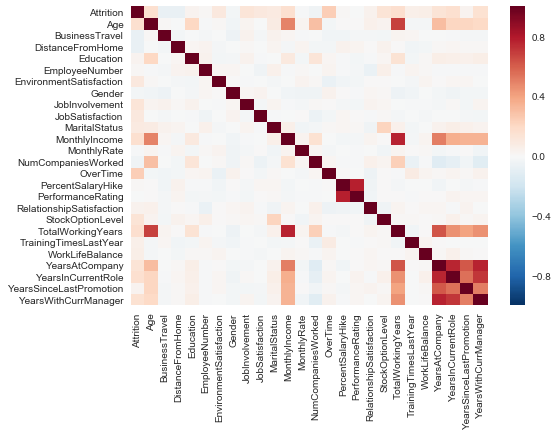

In [41]:
sns.heatmap(data.corr())
plt.show()

In [42]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 26 columns):
Attrition                   1470 non-null int8
Age                         1470 non-null int64
BusinessTravel              1470 non-null int8
DistanceFromHome            1470 non-null int64
Education                   1470 non-null int64
EmployeeNumber              1470 non-null int64
EnvironmentSatisfaction     1470 non-null int64
Gender                      1470 non-null int8
JobInvolvement              1470 non-null int64
JobSatisfaction             1470 non-null int64
MaritalStatus               1470 non-null int8
MonthlyIncome               1470 non-null int64
MonthlyRate                 1470 non-null int64
NumCompaniesWorked          1470 non-null int64
OverTime                    1470 non-null int8
PercentSalaryHike           1470 non-null int64
PerformanceRating           1470 non-null int64
RelationshipSatisfaction    1470 non-null int64
StockOptionLevel            1470 n

In [43]:
data = data.join(dropdepartment)
data.head()

,Attrition,Age,BusinessTravel,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,Gender,JobInvolvement,JobSatisfaction,...,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Research & Development,Sales
0,0,41,1,1,2,1,2,0,3,4,...,0,8,0,1,6,4,0,5,0,1
1,1,49,1,8,1,2,3,1,2,2,...,1,10,3,3,10,7,1,7,1,0
2,0,37,1,2,2,4,4,1,2,3,...,0,7,3,3,0,0,0,0,1,0
3,1,33,1,3,4,5,4,0,3,3,...,0,8,3,3,8,7,3,0,1,0
4,1,27,1,2,1,7,1,1,3,2,...,1,6,3,3,2,2,2,2,1,0


In [44]:
data = data.join(dropeducation)
data.head()

,Attrition,Age,BusinessTravel,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,Gender,JobInvolvement,JobSatisfaction,...,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Research & Development,Sales,Life Sciences,Marketing,Medical,Other,Technical Degree
0,0,41,1,1,2,1,2,0,3,4,...,4,0,5,0,1,1,0,0,0,0
1,1,49,1,8,1,2,3,1,2,2,...,7,1,7,1,0,1,0,0,0,0
2,0,37,1,2,2,4,4,1,2,3,...,0,0,0,1,0,0,0,0,1,0
3,1,33,1,3,4,5,4,0,3,3,...,7,3,0,1,0,1,0,0,0,0
4,1,27,1,2,1,7,1,1,3,2,...,2,2,2,1,0,0,0,1,0,0


In [45]:
data = data.join(droprole)
data.head()

,Attrition,Age,BusinessTravel,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,Gender,JobInvolvement,JobSatisfaction,...,Other,Technical Degree,Healthcare Representative,Laboratory Technician,Manager,Manufacturing Director,Research Director,Research Scientist,Sales Executive,Sales Representative
0,0,41,1,1,2,1,2,0,3,4,...,0,0,0,0,0,0,0,0,1,0
1,1,49,1,8,1,2,3,1,2,2,...,0,0,0,0,0,0,0,1,0,0
2,0,37,1,2,2,4,4,1,2,3,...,1,0,0,1,0,0,0,0,0,0
3,1,33,1,3,4,5,4,0,3,3,...,0,0,0,0,0,0,0,1,0,0
4,1,27,1,2,1,7,1,1,3,2,...,0,0,0,1,0,0,0,0,0,0


In [46]:
data["Attrition"].value_counts()/len(data)*100

1    83.877551
0    16.122449
Name: Attrition, dtype: float64

In [47]:
from sklearn.tree import DecisionTreeClassifier

In [48]:
model = DecisionTreeClassifier(random_state=41)

In [49]:
inputs = data.iloc[:,1:]
output = data["Attrition"]

In [50]:
model.fit(inputs,output)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=41, splitter='best')

In [51]:
model.score(inputs,output)*100

100.0

In [52]:
from sklearn.tree import export_graphviz

In [53]:
train, test = train_test_split(data,test_size=0.25)

In [54]:
len(test)

368

In [55]:
len(train)

1102

In [56]:
model_d = DecisionTreeClassifier(max_depth=5, random_state=35)

In [57]:
inputs_train,inputs_test,output_train,output_test = train_test_split(inputs,output,test_size=0.25)

In [58]:
model_d.fit(inputs_train,output_train)
model_d.score(inputs_test,output_test)*100

83.152173913043484

In [59]:
from sklearn.tree import export_graphviz

In [60]:
export_graphviz(model_d,"tree.dot")

In [61]:
df = pd.DataFrame(index=list(data)[1:],data=model_d.feature_importances_)
df

,0
Age,0.060270
BusinessTravel,0.000000
DistanceFromHome,0.062459
Education,0.000000
EmployeeNumber,0.013260
EnvironmentSatisfaction,0.054897
Gender,0.000000
JobInvolvement,0.044195
JobSatisfaction,0.000000
MaritalStatus,0.000000


In [62]:
df.sort_values(by=0, ascending=False)

,0
MonthlyIncome,0.165303
OverTime,0.129719
Sales Executive,0.077277
MonthlyRate,0.065414
YearsInCurrentRole,0.065263
DistanceFromHome,0.062459
Age,0.060270
TotalWorkingYears,0.058749
EnvironmentSatisfaction,0.054897
YearsSinceLastPromotion,0.049116
